In [ ]:
from mylib.statistic_test import *

code_id = "0839 - Behavioral Reasons for Remapping"
loc = join(figpath, "Dsp", code_id)
mkdir(loc)

with open(f2['Trace File'][13], 'rb') as handle:
    trace = pickle.load(handle)

        E:\Data\FinalResults\Dsp\0839 - Behavioral Reasons for Remapping is already existed!


# Initial Speed

        E:\Data\FinalResults\Dsp\0839 - Behavioral Reasons for Remapping is already existed!


100%|██████████| 28/28 [00:40<00:00,  1.44s/it]


(5900,)


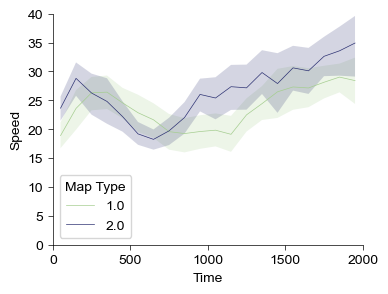

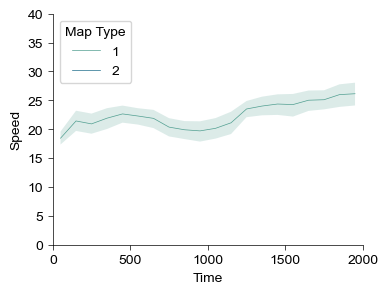

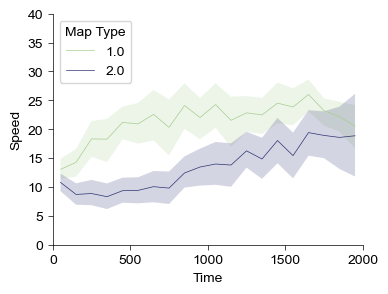

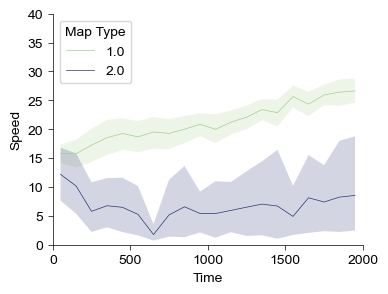

In [3]:
from mylib.statistic_test import *

code_id = "0839 - Behavioral Reasons for Remapping"
loc = join(figpath, "Dsp", code_id)
mkdir(loc)

if exists(join(figdata, code_id+'  [init speed].pkl')) == False:
    idx = np.where(f2['MiceID'] != 10209)[0]
    SpeedData = DataFrameEstablish(
        variable_names = ['Speed', 'Map Type', 'Time', 'Corr'], 
        f=f2, file_name=code_id + ' [init speed]', file_idx=idx, 
        function=InitSpeedForRemapping_DSP_Interface, behavior_paradigm='DSPMaze'
    )
else:
    with open(os.path.join(figdata, code_id+' [init speed].pkl'), 'rb') as handle:
        SpeedData = pickle.load(handle)

SpeedData['Time'] = (SpeedData['Time'] // 100).astype(np.int64)*100 + 50

for mouse in np.unique(SpeedData['MiceID']):
    idx = np.where(SpeedData['MiceID'] == mouse)[0]
    SubData = SubDict(SpeedData, SpeedData.keys(), idx)
    fig = plt.figure(figsize = (4,3))
    ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
    sns.lineplot(
        x='Time',
        y='Speed',
        hue='Map Type',
        data=SubData,
        palette="crest",
        ax=ax,
        hue_order=[1,2],
        err_kws={"edgecolor": None},
        linewidth=0.5
    )
    ax.set_ylim(0, 40)
    ax.set_xlim(0, 2000)
    plt.savefig(join(loc, f'Init Speed {mouse}.png'), dpi = 600)
    plt.savefig(join(loc, f'Init Speed {mouse}.svg'), dpi = 600)
    plt.show()

# Hesitation

        E:\Data\FinalResults\Dsp\0839 - Behavioral Reasons for Remapping is already existed!
Ttest_indResult(statistic=2.8796435030904557, pvalue=0.004301431640144623)


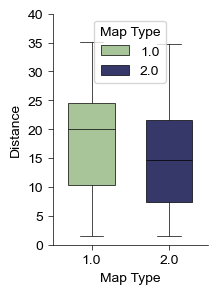

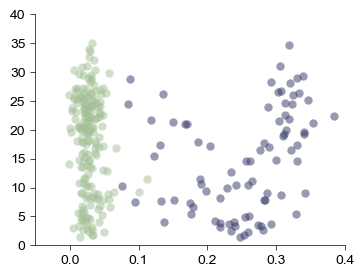

-0.11737948835047743 0.053599970037284554
Ttest_indResult(statistic=2.6985875132090724, pvalue=0.007404067611226832)


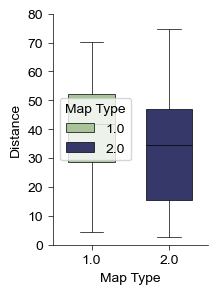

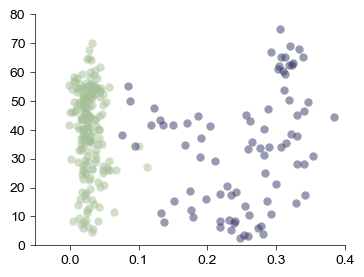

-0.10086384658509323 0.09752320034648695


In [15]:
from mylib.statistic_test import *
from sklearn import linear_model

from statsmodels.formula.api import mixedlm

code_id = "0839 - Behavioral Reasons for Remapping"
loc = join(figpath, "Dsp", code_id)
mkdir(loc)

if exists(join(figdata, code_id+' [init hesitation].pkl')) == False:
    idx = np.where(f2['MiceID'] != 10209)[0]
    HesData = DataFrameEstablish(
        variable_names = ['Distance', 'Map Type', 'Corr', 'Time'], 
        f=f2, file_name=code_id + ' [init hesitation]', file_idx=idx, 
        function=InitCumulativeDistanceForRemapping_DSP_Interface, behavior_paradigm='DSPMaze'
    )
else:
    with open(os.path.join(figdata, code_id+' [init hesitation].pkl'), 'rb') as handle:
        HesData = pickle.load(handle)

idx = np.where(HesData['Time'] == '1s')[0]
SubData = SubDict(HesData, HesData.keys(), idx)
fig = plt.figure(figsize = (2,3))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.boxplot(
    x='Map Type',
    y='Distance',
    data=SubData,
    hue='Map Type',
    palette='crest',
    linecolor='k',
    linewidth=0.5,
    ax=ax,
    width=0.6
)
ax.set_ylim(0, 40)
idx_map1 = np.where(SubData['Map Type'] == 1)[0]
idx_map2 = np.where(SubData['Map Type'] == 2)[0]
print(ttest_ind(SubData['Distance'][idx_map1], SubData['Distance'][idx_map2]))
plt.savefig(join(loc, f'Init Hesitation [1s].png'), dpi = 600)
plt.savefig(join(loc, f'Init Hesitation [1s].svg'), dpi = 600)
plt.show()

fig = plt.figure(figsize = (4,3))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
ax.scatter(
    SubData['Corr'][idx_map1],
    SubData['Distance'][idx_map1],
    color = '#A4C096',
    alpha = 0.5,
    linewidths=0.,
    edgecolors=None
)
ax.scatter(
    SubData['Corr'][idx_map2],
    SubData['Distance'][idx_map2],
    color = '#333766',
    alpha = 0.5,
    linewidths=0.,
    edgecolors=None
)
ax.set_ylim(0, 40)
ax.set_xlim(-0.05, 0.4)
plt.savefig(join(loc, f'Init Hesitation Correlation [1s].png'), dpi = 600)
plt.savefig(join(loc, f'Init Hesitation Correlation [1s].svg'), dpi = 600)
plt.show()
r, p = pearsonr(SubData['Corr'], SubData['Distance'])
print(r, p)

idx = np.where(HesData['Time'] == '2s')[0]
SubData = SubDict(HesData, HesData.keys(), idx)
fig = plt.figure(figsize = (2,3))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.boxplot(
    x='Map Type',
    y='Distance',
    data=SubData,
    hue='Map Type',
    palette='crest',
    linecolor='k',
    linewidth=0.5,
    ax=ax,
    width=0.6
)
ax.set_ylim(0, 80)
idx_map1 = np.where(SubData['Map Type'] == 1)[0]
idx_map2 = np.where(SubData['Map Type'] == 2)[0]
print(ttest_ind(SubData['Distance'][idx_map1], SubData['Distance'][idx_map2]))
plt.savefig(join(loc, f'Init Hesitation [2s].png'), dpi = 600)
plt.savefig(join(loc, f'Init Hesitation [2s].svg'), dpi = 600)
plt.show()

fig = plt.figure(figsize = (4,3))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
ax.scatter(
    SubData['Corr'][idx_map1],
    SubData['Distance'][idx_map1],
    color = '#A4C096',
    alpha = 0.5,
    linewidths=0.,
    edgecolors=None
)
ax.scatter(
    SubData['Corr'][idx_map2],
    SubData['Distance'][idx_map2],
    color = '#333766',
    alpha = 0.5,
    linewidths=0.,
    edgecolors=None
)
ax.set_ylim(0, 80)
ax.set_xlim(-0.05, 0.4)
plt.savefig(join(loc, f'Init Hesitation Correlation [2s].png'), dpi = 600)
plt.savefig(join(loc, f'Init Hesitation Correlation [2s].svg'), dpi = 600)
plt.show()
r, p = pearsonr(SubData['Corr'], SubData['Distance'])
print(r, p)

        E:\Data\FinalResults\Dsp\0839 - Behavioral Reasons for Remapping is already existed!
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 5 5 5
 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0]


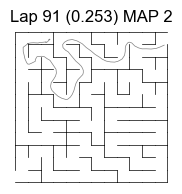

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3
 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 5 5
 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0]


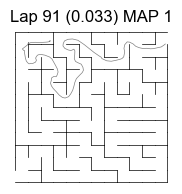

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


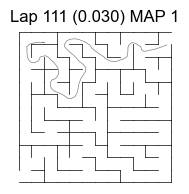

In [8]:
from mylib.statistic_test import *

code_id = "0839 - Behavioral Reasons for Remapping"
loc = join(figpath, "Dsp", code_id)
mkdir(loc)

with open(f2['Trace File'][28], 'rb') as handle:
    trace = pickle.load(handle)
    
beg, end = LapSplit(trace, trace['paradigm'])
route_ids = classify_lap(spike_nodes_transform(trace['correct_nodes'], 12), beg)
print(route_ids)

for i in np.where(route_ids == 6)[0]:
    if i != 90:
        continue
    idx = np.where((trace['correct_time'] >= trace['lap beg time'][i]) & (trace['correct_time'] <= trace['lap end time'][i]))[0]
    map_type = 1 if trace['lapwise_corr'][i] <= 0.114 else 2
    fig = plt.figure(figsize = (2,2))
    ax = Clear_Axes(plt.axes())
    DrawMazeProfile(axes=ax, maze_type=1, color='k', linewidth=0.5, nx=48)
    ax.plot(trace['correct_pos'][idx, 0]/20-0.5, trace['correct_pos'][idx, 1]/20-0.5, color = 'gray',zorder = 1, linewidth = 0.5)
    ax.set_title(f"Lap {i+1} ({trace['lapwise_corr'][i]:.3f}) MAP {map_type}")
    plt.savefig(join(loc, f"[Example Lap] {trace['MiceID']}, {trace['date']}, Lap {i+1}.png"), dpi = 600)
    plt.savefig(join(loc, f"[Example Lap] {trace['MiceID']}, {trace['date']}, Lap {i+1}.svg"), dpi = 600)
    plt.show()
    
with open(f2['Trace File'][29], 'rb') as handle:
    trace = pickle.load(handle)
    
beg, end = LapSplit(trace, trace['paradigm'])
route_ids = classify_lap(spike_nodes_transform(trace['correct_nodes'], 12), beg)
print(route_ids)

for i in np.where(route_ids == 6)[0]:
    if i != 90:
        continue
    idx = np.where((trace['correct_time'] >= trace['lap beg time'][i]) & (trace['correct_time'] <= trace['lap end time'][i]))[0]
    map_type = 1 if trace['lapwise_corr'][i] <= 0.114 else 2
    fig = plt.figure(figsize = (2,2))
    ax = Clear_Axes(plt.axes())
    DrawMazeProfile(axes=ax, maze_type=1, color='k', linewidth=0.5, nx=48)
    ax.plot(trace['correct_pos'][idx, 0]/20-0.5, trace['correct_pos'][idx, 1]/20-0.5, color = 'gray',zorder = 1, linewidth = 0.5)
    ax.set_title(f"Lap {i+1} ({trace['lapwise_corr'][i]:.3f}) MAP {map_type}")
    plt.savefig(join(loc, f"[Example Lap] {trace['MiceID']}, {trace['date']}, Lap {i+1}.png"), dpi = 600)
    plt.savefig(join(loc, f"[Example Lap] {trace['MiceID']}, {trace['date']}, Lap {i+1}.svg"), dpi = 600)
    plt.show()
    
with open(f2['Trace File'][34], 'rb') as handle:
    trace = pickle.load(handle)
    
beg, end = LapSplit(trace, trace['paradigm'])
route_ids = classify_lap(spike_nodes_transform(trace['correct_nodes'], 12), beg)
print(route_ids)

for i in np.where(route_ids == 6)[0]:
    if i != 110:
        continue
    idx = np.where((trace['correct_time'] >= trace['lap beg time'][i]) & (trace['correct_time'] <= trace['lap end time'][i]))[0]
    map_type = 1 if trace['lapwise_corr'][i] <= 0.114 else 2
    fig = plt.figure(figsize = (2,2))
    ax = Clear_Axes(plt.axes())
    DrawMazeProfile(axes=ax, maze_type=1, color='k', linewidth=0.5, nx=48)
    ax.plot(trace['correct_pos'][idx, 0]/20-0.5, trace['correct_pos'][idx, 1]/20-0.5, color = 'gray',zorder = 1, linewidth = 0.5)
    ax.set_title(f"Lap {i+1} ({trace['lapwise_corr'][i]:.3f}) MAP {map_type}")
    plt.savefig(join(loc, f"[Example Lap] {trace['MiceID']}, {trace['date']}, Lap {i+1}.png"), dpi = 600)
    plt.savefig(join(loc, f"[Example Lap] {trace['MiceID']}, {trace['date']}, Lap {i+1}.svg"), dpi = 600)
    plt.show()

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3
 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 5 5
 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0]


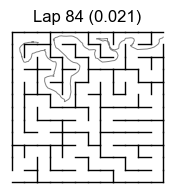

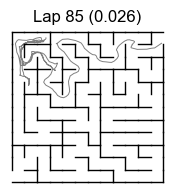

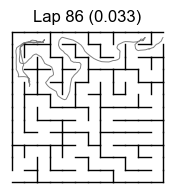

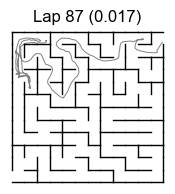

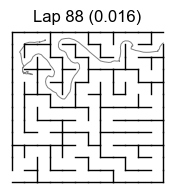

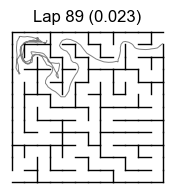

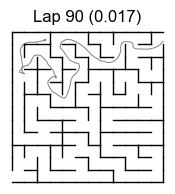

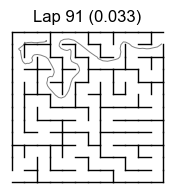

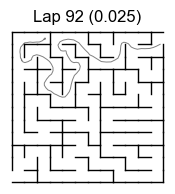

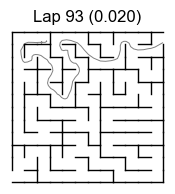

In [22]:
with open(f2['Trace File'][29], 'rb') as handle:
    trace = pickle.load(handle)
beg, end = LapSplit(trace, trace['paradigm'])
route_ids = classify_lap(spike_nodes_transform(trace['correct_nodes'], 12), beg)
print(route_ids)

for i in np.where(route_ids == 6)[0]:
    idx = np.where((trace['correct_time'] >= trace['lap beg time'][i]) & (trace['correct_time'] <= trace['lap end time'][i]))[0]
    map_type = 1 if trace['lapwise_corr'][i] <= 0.0915 else 2
    fig = plt.figure(figsize = (2,2))
    ax = Clear_Axes(plt.axes())
    DrawMazeProfile(axes=ax, maze_type=1, color='k', linewidth=1, nx=48)
    ax.plot(trace['correct_pos'][idx, 0]/20-0.5, trace['correct_pos'][idx, 1]/20-0.5, color = 'gray',zorder = 1, linewidth = 0.7)
    ax.set_title(f"Lap {i+1} ({trace['lapwise_corr'][i]:.3f})")
    plt.show()